# Intentions

In [12]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import squarify # pip install squarify
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px # Requires: pip install plotly


In [13]:
file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/BreachSongs2.xlsx'
df = pd.read_excel(file_path)

In [14]:
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once", "not", "no", "yes", "so", "can", "just", "dont", "yeah", "let"
]

# Function to remove stop words from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

lyrics = """"I am starting it all over once again
 Did I learn a thing?
 (hoo-hoo-hoo, hoo-hoo-hoo, hoo-hoo-hoO)

 Intentions are everything
 (hoo-hoo-hoo, hoo-hoo-hoo, hoo-hoo-hoO)
 Intentions will set you free

 You will fail most every day and every way
 Did you learn a thing?
 (hoo-hoo-hoo, hoo-hoo-hoo, hoo-hoo-hoO)

 Intentions lack memory
 (hoo-hoo-hoo, hoo-hoo-hoo, hoo-hoo-hoO)
 Intentions will set you free

 Just try to be"""""

In [15]:
# 1. Normalize: lowercase and remove punctuation
# We do this first so "Sun." becomes "sun"
clean_lyrics = re.sub(r'[^\w\s]', '', lyrics.lower())

# 2. Filter: Use your function directly on the string
# No .apply() needed for standard strings
filtered_lyrics = remove_stopwords(clean_lyrics)

# 3. Split: Break the string into a list of words
words = filtered_lyrics.split()

# 4. Tally: Count occurrences
counts = Counter(words)

# 5. Output: View the most frequent meaningful words
print(counts.most_common(10))

[('hoohoohoo', 12), ('intentions', 4), ('will', 3), ('learn', 2), ('thing', 2), ('set', 2), ('free', 2), ('every', 2), ('starting', 1), ('all', 1)]


### Intentions Chart

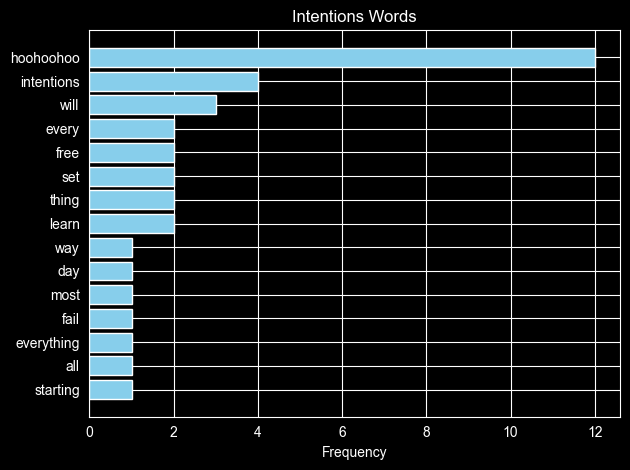

In [16]:
# Convert your Counter object to a sorted DataFrame
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
df_counts = df_counts.sort_values(by='Count', ascending=True)

# Create the plot
plt.barh(df_counts['Word'], df_counts['Count'], color='skyblue')
plt.xlabel('Frequency')
plt.title('Intentions Words')
plt.tight_layout()

# Save or display
plt.savefig('intentions.png')

### Intentions Lollipop

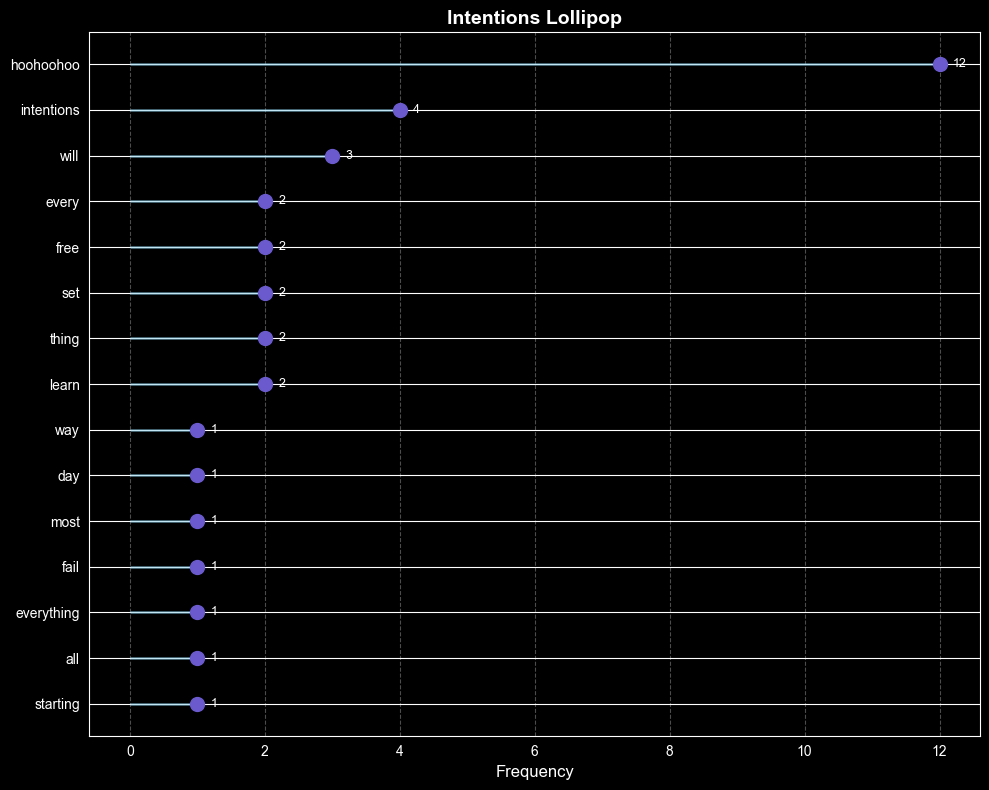

In [17]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
# Sorting ensures the "longest" lollipops are at the top
df_counts = df_counts.sort_values(by='Count', ascending=True)

# 2. Create the plot
plt.figure(figsize=(10, 8))

# Draw the "stems" (horizontal lines)
plt.hlines(y=df_counts['Word'], xmin=0, xmax=df_counts['Count'], color='skyblue', alpha=0.5, linewidth=2)

# Draw the "candies" (the dots)
plt.plot(df_counts['Count'], df_counts['Word'], "o", markersize=10, color='slateblue')

# 3. Styling
plt.xlabel('Frequency', fontsize=12)
plt.title('Intentions Lollipop', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3) # Horizontal grids help track the values

# Add labels to the end of the dots (optional)
for i, count in enumerate(df_counts['Count']):
    plt.text(count + 0.2, i, str(count), va='center', fontsize=9)

plt.tight_layout()

# 4. Save or display
plt.savefig('intentions_lollipop.png')
plt.show()

### Intentions Bubble Chart

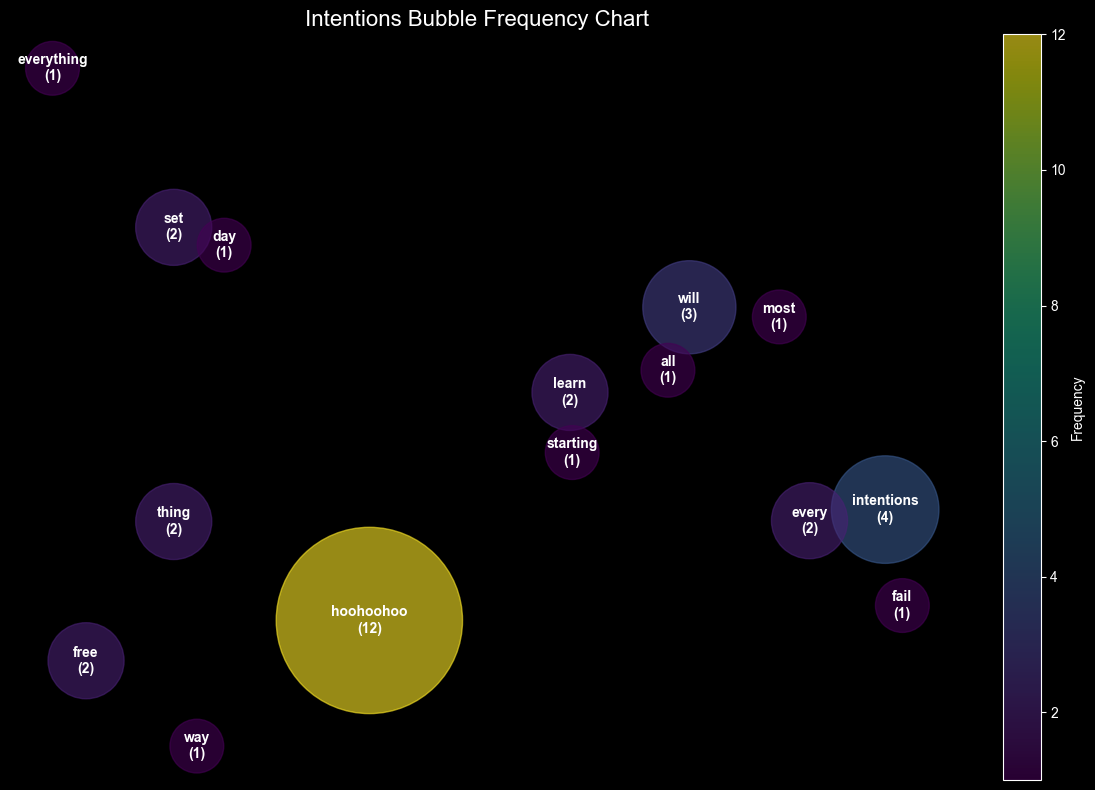

In [18]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Setup positions for the bubbles (random or ordered)
# We use random X and Y coordinates to spread the bubbles out
np.random.seed(42) # Keeps the layout the same every time you run it
df_counts['x'] = np.random.rand(15)
df_counts['y'] = np.random.rand(15)

# 3. Create the plot
plt.figure(figsize=(12, 8))

# Squaring the count allows for more dramatic size differences
df_counts['size'] = df_counts['Count'] ** 2

# s= size of bubbles (multiplied by a factor to make them visible)
# c= color (can be mapped to the count)
scatter = plt.scatter(
    df_counts['x'],
    df_counts['y'],
    s=df_counts['Count'] * 1500,  # Adjust the multiplier (100) based on your data scale
    c=df_counts['Count'],
    cmap='viridis',
    alpha=0.6,
)

# 4. Add the word labels inside or near the bubbles
for i, row in df_counts.iterrows():
    plt.annotate(
        f"{row['Word']}\n({row['Count']})",
        (row['x'], row['y']),
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# 5. Styling
plt.title('Intentions Bubble Frequency Chart', fontsize=16)
plt.axis('off') # Hide axes for a cleaner "cloud" look
plt.colorbar(scatter, label='Frequency') # Optional: adds a color scale legend

plt.tight_layout()
plt.savefig('intentions_bubble.png')
plt.show()

### Intentions Tree Map

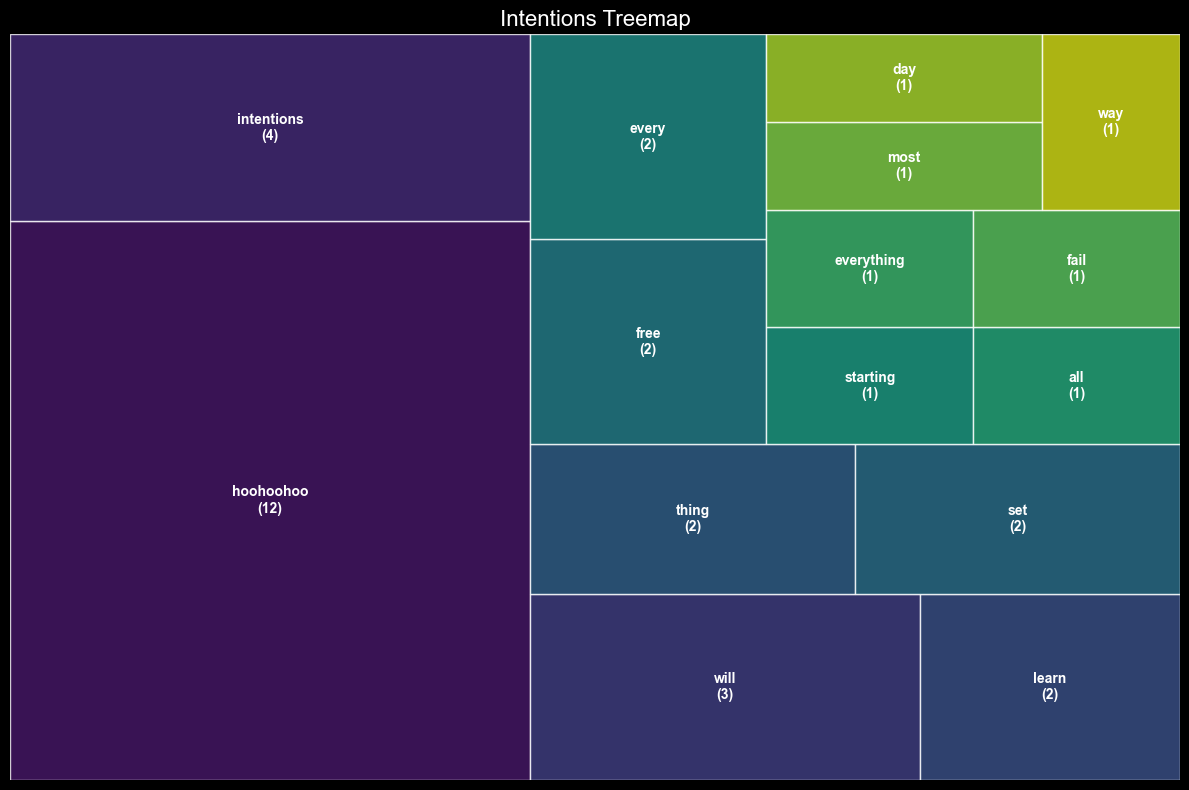

In [19]:
# 1. Prepare your data (from your existing Counter object)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Create the plot
plt.figure(figsize=(12, 8))

# Define colors (using a nice Seaborn palette)
colors = sns.color_palette('viridis', len(df_counts))

# Create labels that include the word and the count
labels = [f"{row['Word']}\n({row['Count']})" for i, row in df_counts.iterrows()]

# 3. Draw the Treemap
squarify.plot(
    sizes=df_counts['Count'],
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 10, 'fontweight': 'bold'}
)

# 4. Styling
plt.title('Intentions Treemap', fontsize=16)
plt.axis('off') # Treemaps don't need axes

plt.tight_layout()
plt.savefig('intentions_treemap.png')
plt.show()

### Intentions Word Cloud

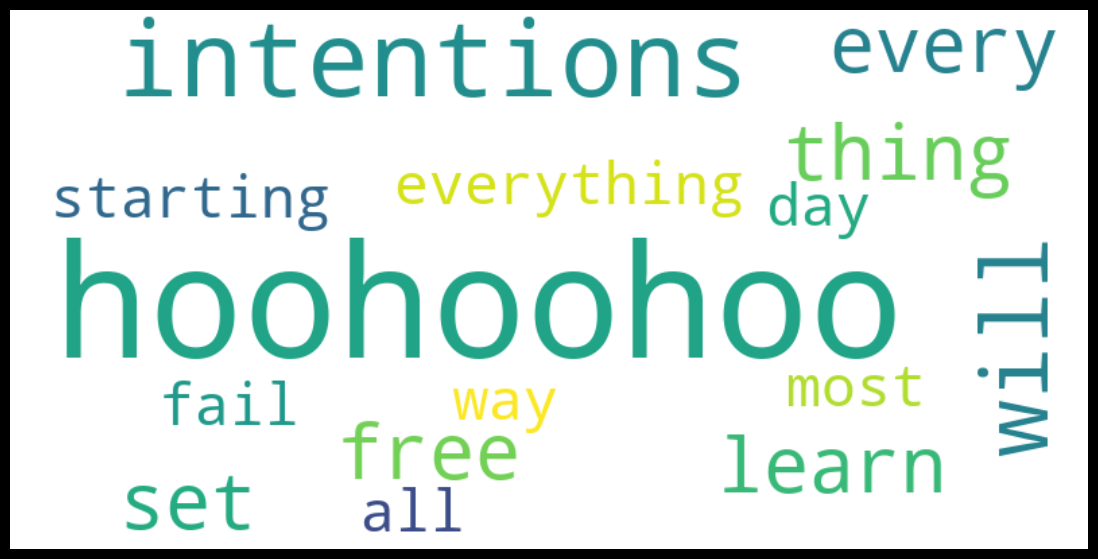

In [20]:
# Join all words into one string weighted by their count
word_freq = dict(counts.most_common(15))

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Intentions Radial Bar Chart

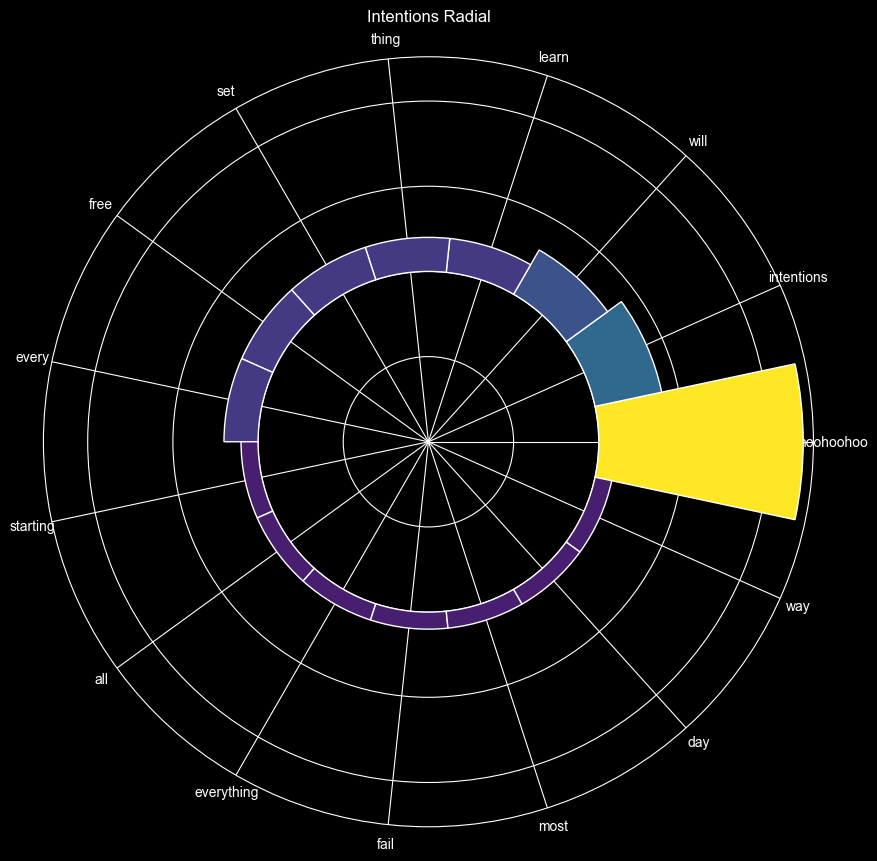

In [21]:
# Prepare data
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
n = len(df_counts)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
widths = [2 * np.pi / n] * n

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Create the bars
bars = ax.bar(angles, df_counts['Count'], width=widths, bottom=10,
              color=plt.cm.viridis(df_counts['Count'] / df_counts['Count'].max()),
              edgecolor='white')

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels(df_counts['Word'], fontsize=10)
ax.set_yticklabels([]) # Hide radial grid numbers
plt.title("Intentions Radial", va='bottom')
plt.show()

### Intentions Funnel Chart

In [22]:
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

fig = px.funnel(df_counts, x='Count', y='Word',
                title='Intentions Funnel',
                color_discrete_sequence=['#636EFA'])
fig.show()